In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [17]:
%run init_utils.ipynb

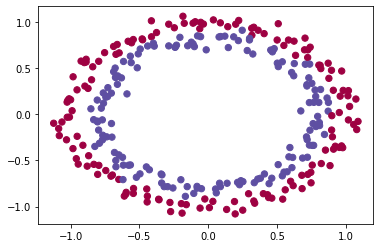

In [3]:
# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

# Neural Network Model

In [9]:
def model(X, Y, learning_rate=0.01, num_iterations=12000, print_cost=True, initialization='he'):
    grads = {}
    costs = []
    m = X.shape[1]
    layer_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layer_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layer_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layer_dims)
    
    for i in range(num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        A3, cache = forward_propagation(X, parameters)
        # Loss
        cost = compute_loss(A3, Y)
        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

# Initialize parameters

In [5]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [27]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

In [12]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893805
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717493
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371814
Cost after iteration 11000: 0.12325079292273546


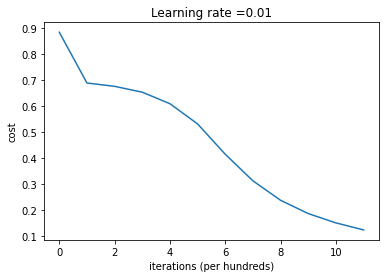

In [15]:
parameters = model(train_X, train_Y, initialization = "he")

In [18]:
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

On the train set:
Accuracy: 0.99
On the test set:
Accuracy: 0.94


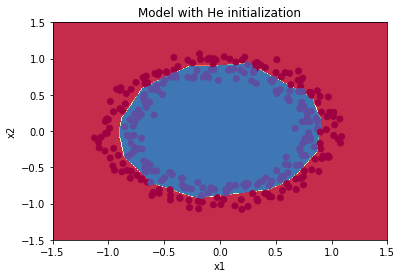

In [19]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<ipython-input-17-e4770e6e4c67>:4: RuntimeWarning: divide by zero encountered in log
  loss = - 1/m * np.sum(np.multiply(Y, np.log(A3)) + np.multiply(1 - Y, np.log(1 - A3)))
<ipython-input-17-e4770e6e4c67>:4: RuntimeWarning: invalid value encountered in multiply
  loss = - 1/m * np.sum(np.multiply(Y, np.log(A3)) + np.multiply(1 - Y, np.log(1 - A3)))


Cost after iteration 0: nan
Cost after iteration 1000: 0.6229291120081059
Cost after iteration 2000: 0.5977852892934525
Cost after iteration 3000: 0.5635863417996275
Cost after iteration 4000: 0.5500755055907987
Cost after iteration 5000: 0.5443312866998165
Cost after iteration 6000: 0.5373482222779037
Cost after iteration 7000: 0.469518369074998
Cost after iteration 8000: 0.3976607148911101
Cost after iteration 9000: 0.3934409278521702
Cost after iteration 10000: 0.3920151004514421
Cost after iteration 11000: 0.389117958399818


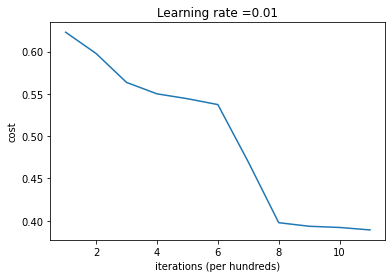

In [28]:
parameters1 = model(train_X, train_Y, initialization='random')

In [29]:
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters1)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters1)

On the train set:
Accuracy: 0.8266666666666667
On the test set:
Accuracy: 0.84


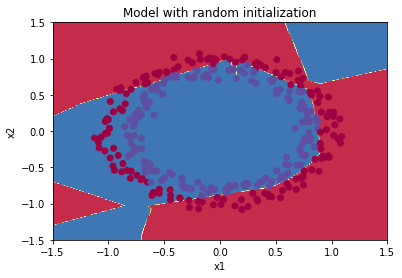

In [30]:
plt.title("Model with random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters1, x.T), train_X, train_Y)

# Nhận xét
He initialization parameters cho kết quả tốt hơn rất nhiều so với khởi tạo tham số ngẫu nhiên hoặc khởi tạo bằng 0